In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Text(0.5,1,'Histogram of charges')

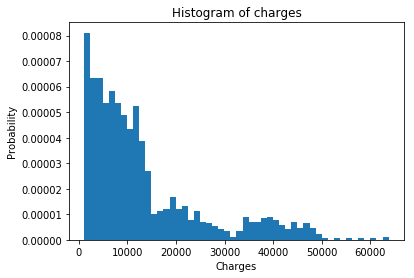

In [14]:
plt.hist(df["charges"], bins = 50, normed = True);
plt.xlabel("Charges")
plt.ylabel("Probability")
plt.title("Histogram of charges")

In [11]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

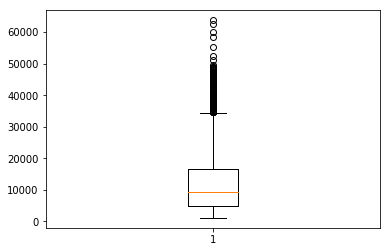

In [16]:
plt.boxplot(df.charges);

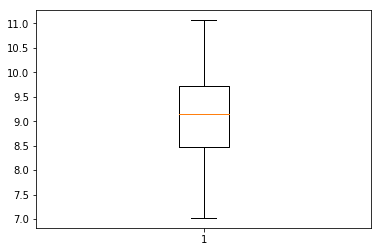

In [17]:
plt.boxplot(np.log(df.charges));

In [18]:
np.log([1, 2, 4, 100, 1000])

array([ 0.        ,  0.69314718,  1.38629436,  4.60517019,  6.90775528])